assignment from https://cjtu.github.io/spirl/f21_a7.html

In [1]:
import timeit
from functools import lru_cache

import numpy as np

In [2]:
# define the recursive Fibonacci function with different implementations
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)


@lru_cache(maxsize=None)
def fibonacci_memoized(n):
    if n <= 1:
        return n
    else:
        return fibonacci_memoized(n - 1) + fibonacci_memoized(n - 2)

The computation is time-consuming for the recursive `fibonacci`. Try to decrease the value of `n` if it is taking too long to execute.

In [3]:
values = np.concatenate((np.arange(1, 11, 1, dtype=int),
                         np.arange(10, 46, 5, dtype=int)))

functions = [fibonacci,
             fibonacci_memoized]
labels = ['Fibonacci',
          'Fibonacci Memoized']
timings = np.zeros((len(values), len(functions)))

# Measure execution time for each method and store in the timings array
for i, value in enumerate(values):
    for j, func in enumerate(functions):
        t = timeit.timeit(lambda: func(value), globals=globals(), number=1)
        timings[i, j] = t

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

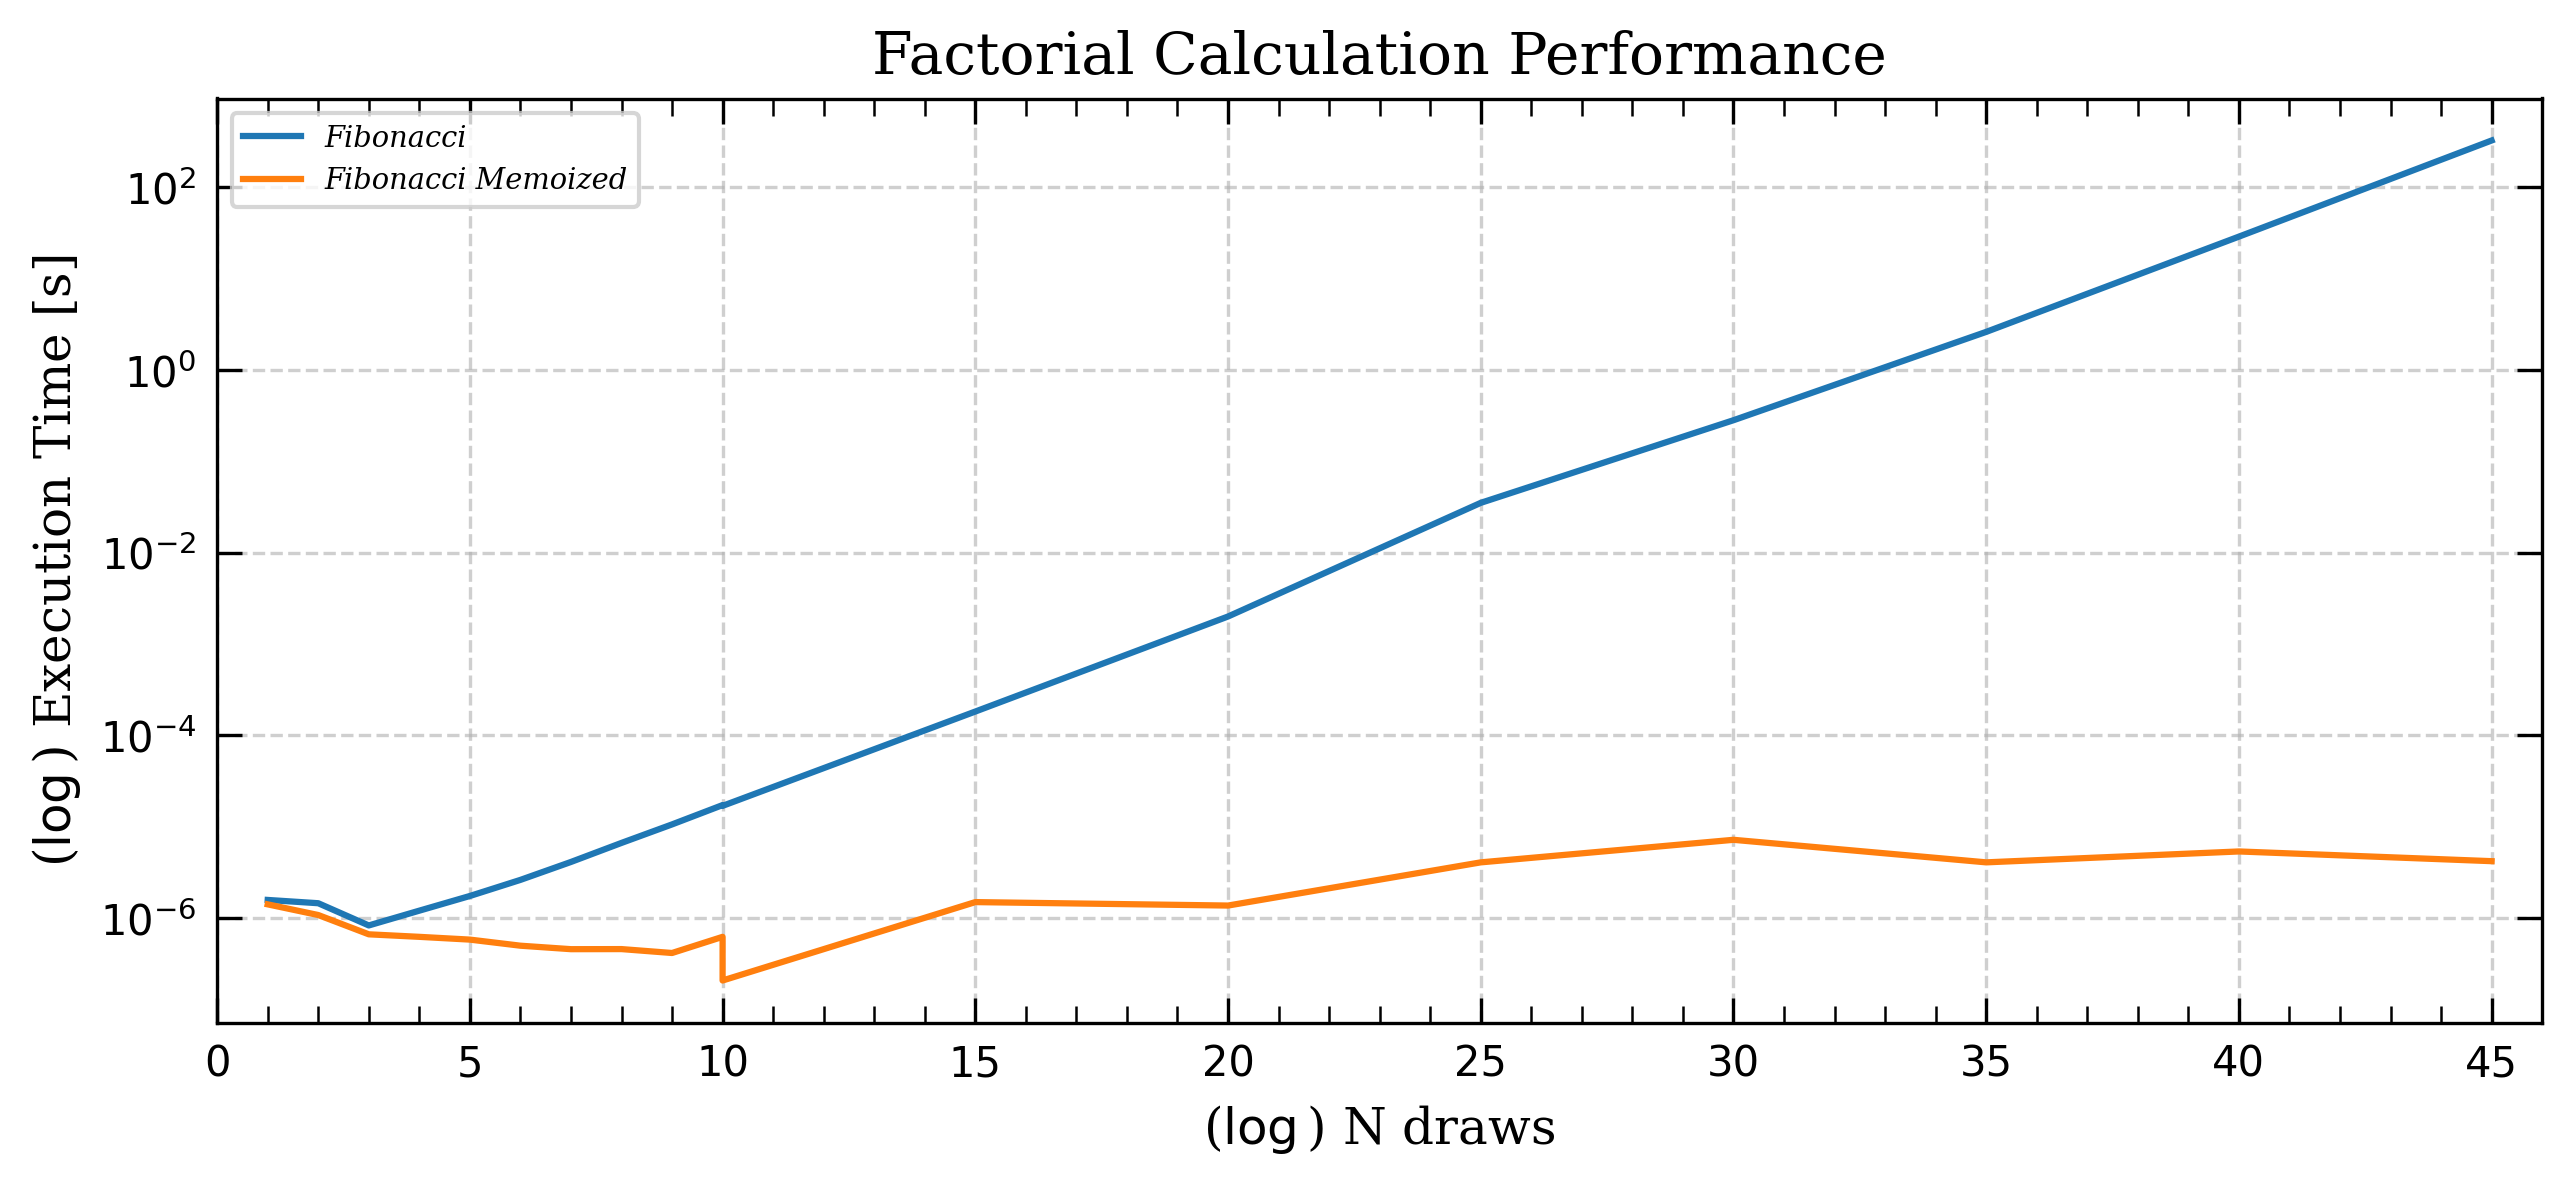

In [5]:
fig, axis = plt.subplots(1, 1, figsize=(10, 4), facecolor='white', dpi=300)

# plot the execution times
for j in range(len(labels)):
    axis.plot(values, timings[:, j], label=labels[j])

# set axis attributes
axis.tick_params(axis='both', right=True, top=True,
                 pad=5, direction='in', length=6, which='major')
axis.tick_params(axis='both', right=True, top=True,
                 pad=5, direction='in', length=4, which='minor')

axis.set_yscale('log')

axis.set_xlim(0, 46)
axis.xaxis.set_minor_locator(AutoMinorLocator(5))
axis.xaxis.set_major_locator(plt.MultipleLocator(5))

axis.legend(loc='upper left',
            prop={'family': 'serif',
                  'style': 'italic',
                  'size': 'x-small'},
            markerscale=1, frameon=True)

# add labels and titles
axis.set_xlabel('($\log$) N draws',
                fontdict={'family': 'serif',
                          'size': 12})
axis.set_ylabel('($\log$) Execution Time [s]',
                fontdict={'family': 'serif',
                          'size': 12})
axis.set_title('Factorial Calculation Performance',
               fontdict={'family': 'serif',
                         'size': 14})

# add a background grid
axis.grid(True, linestyle='--', alpha=.6, zorder=-1)